In [1]:
# import neceessary libraries
import csv
import sqlite3
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# create pandas dataframe from website_data.csv file
df = pd.read_csv('website_data.csv', encoding='utf-8', low_memory=False)
df

,order_number,ordered_item_style,ordered_item_size,ordered_item_pattern,total,shipto_person_name,shipto_person_city,shipto_person_state_code,shipto_person_state_name,shipto_person_country_code,shipto_person_postal_code,coupon_code
0,14,LEGGINGS_ONE_SIZE_SOLIDS,ONE SIZE,SOLIDS,25,Lynsey Herlihy,Arroyo Grande,CA,California,US,93420,NaN
1,15,CLASSIC_X-LARGE,X-LARGE,NaN,35,Sarah Shields,Baldwinsville,NY,New York,US,13027,NaN
2,15,LEGGINGS_ONE_SIZE_GEOMETRIC,ONE SIZE,GEOMETRIC,25,Sarah Shields,Baldwinsville,NY,New York,US,13027,NaN
3,15,LEGGINGS_TALL_CURVY_FLORAL,TALL CURVY,FLORAL,25,Sarah Shields,Baldwinsville,NY,New York,US,13027,NaN
4,15,LEGGINGS_TALL_CURVY_FLORAL,TALL CURVY,FLORAL,25,Sarah Shields,Baldwinsville,NY,New York,US,13027,NaN
5,16,LEGGINGS_TALL_CURVY_FLORAL,TALL CURVY,FLORAL,25,Dari Norman,Greenwich,NY,New York,US,12834,LETSGOROE
6,17,ANA_MEDIUM,MEDIUM,NaN,48,Cynthia Christner,Vicksburg,MI,Michigan,US,49097,NaN
7,18,CARLY_SMALL,SMALL,NaN,55,Mary Helen Cepparulo,Jackson,TN,Tennessee,US,38305,NaN
8,20,JULIA_LARGE,LARGE,NaN,36,Deborah Adamo,Webster,NY,New York,US,14580,NaN
9,20,JULIA_LARGE,LARGE,NaN,36,Deborah Adamo,Webster,NY,New York,US,14580,NaN


In [3]:
# create connection tpo sqlite databases and start new if does not exist
conn = sqlite3.connect('website.db')

In [4]:
df.to_sql('website_table', conn, if_exists='replace') # create table inside db

In [5]:
# return data from db, sort, count
df_website = pd.read_sql_query('SELECT ordered_item_style AS Collection, COUNT(*) AS Items_Sold FROM website_table GROUP BY ordered_item_style, ordered_item_pattern ORDER BY Items_Sold DESC', conn)
df_website


,Collection,Items_Sold
0,LEGGINGS_ONE_SIZE_GEOMETRIC,108
1,LEGGINGS_TALL_CURVY_GEOMETRIC,94
2,LEGGINGS_TALL_CURVY_FLORAL,70
3,LEGGINGS_ONE_SIZE_DISNEY,61
4,LEGGINGS_ONE_SIZE_FLORAL,60
5,LEGGINGS_ONE_SIZE_HEARTS,48
6,LEGGINGS_TALL_CURVY_HEARTS,48
7,LEGGINGS_ONE_SIZE_AMERICANA,29
8,LEGGINGS_ONE_SIZE_SOLIDS,28
9,LEGGINGS_TALL_CURVY_SOLIDS,28


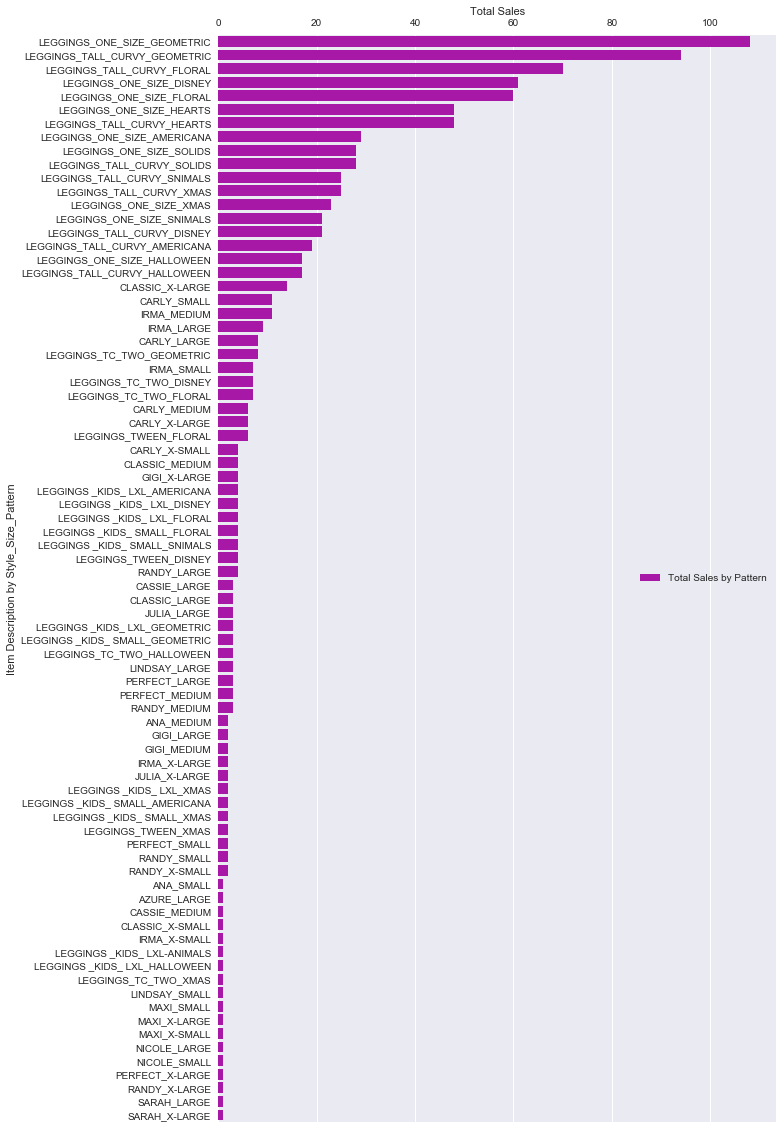

In [6]:
# make bar chart to display data
f, ax = plt.subplots(figsize=(10,20))

# x-axis counts, y-axis is product
sns.barplot(x='Items_Sold', y='Collection', data=df_website, color='m', label='Total Sales by Pattern')

# label the indexes
ax.set_xlabel('Total Sales')
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Item Description by Style_Size_Pattern') 
ax.xaxis.tick_top()
ax.legend(loc='center right')
plt.show()